# Asymmetric loss functions

When we are trying to predict some business value, we can use ML algorithms to find patterns in data.  
To compare different models with each other, we need some *Loss function*.

- Loss function - error of algorithm on dataset.    

It shows, how predictions of our model are different from read target values  
One of the most popular loss functions - RMSE (Root Mean Squared Error). This function penalizes algorithms for High errors (Outliers), and it is symmetrical to sign of error (+ or -) - deviation to the up or down direction (overforcast and underforcast respectively)  


However, in different business cases, there could be situations when Under forecast is more preferable than Over forecast.  
In such cases, Asymmetric quality metrics can be used.

# Demand Prognosis

Let us consider big Retail company example. One of the important tasks in such company might be prediction of demand to understand how many different products we need to deliver to specific shop.
- assume that delivers happen once in 3 months    
    - if we deliver less product then demand, we will not be able to supply all new clients (Missed profit)
    - if we deliver more product then demand, it will fill all store space, therefore next time we will not be able to deliver new products


We will develop loss function, that would be adequate for this business task.    
To choose the proper loss function, we need to understand consequences of Underestimation and Overestimation:  
1. In case of Underestimation of the Demand we would face the problem, when people come to the shop and can not buy products, because they are out of stock. This leads to loss of customers trust and loss of profit.  
2. In case of Overestimation, we deliver more products to the shop's stock and in the end of the month or other period, some quantities of products are left in the stock. Since stock space is not infinite, we can not deliver new products of different new models etc. Also, we spent more on holding products in shop.  
The fist case of Underestimation is more harmful for business, therefore we will use Metric which penalizes Underestimation more than Overestimation.  


In this example we will consider one of the most easily interpreted metrics - Quantile Loss  

In [7]:
# import libraries for tables and visualization:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
# quantile loss function
def quantile_loss(true, pred, gamma):
    val1 = gamma * np.abs(true - pred)
    val2 = (1-gamma) * np.abs(true - pred)
    q_loss = np.where(true >= pred, val1, val2)
    return q_loss

Let's see how Quantile Loss function with different Gamma coefficients behaves around the 0 error point (point, where prediction is equal to the actual true value of target variable)

On the graph below True (actual) value of Demand = 100 units.  
To the left of this point there are point of Underestimated demand (predicted demand is lower than actual), and to the right of "True" point there are point of Overestimated demand (predicted demand is higher than actual)

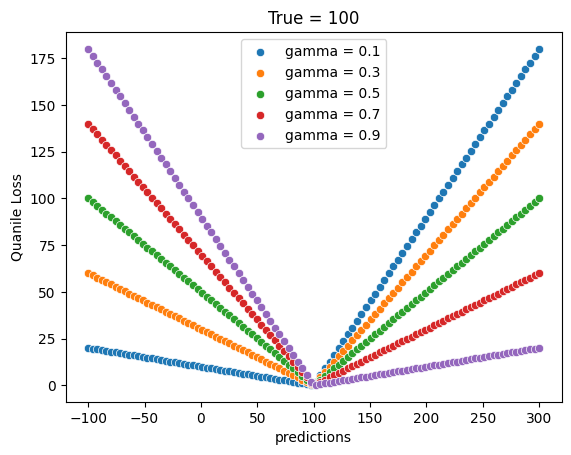

In [9]:
true = 100
predictions = np.linspace(true-200, true+200, 100)
df_predictions = pd.DataFrame(predictions)
df_predictions.columns = ['predictions']

scores = {}
# different Gamma values:
for gamma_test in [0.1, 0.3, 0.5, 0.7, 0.9]:
    losses = quantile_loss(true, predictions, gamma_test)
    scores[gamma_test] = losses
df_losses = pd.DataFrame(scores)
df_losses = pd.merge(df_losses, df_predictions, left_index=True, right_index=True)
for gamma_test in [0.1, 0.3, 0.5, 0.7, 0.9]:
    sns.scatterplot(data=df_losses, x='predictions', y=gamma_test, label=f'gamma = {gamma_test}')
    plt.ylabel('Quanile Loss')
    plt.title('True = 100')

We can see in the Graph, that the Quantile Loss function with Gamma = 0.5 - is symmetric and actually equals to MAE  
- When Gamma is less than 0.5 function produces smaller score for underestimation and higher scores for overestimation  
- An vice versa when Gamma is greater than 0.5, model penalizes Underestimation more (this is what we need for predicting demand task)  
In this example we will take Gamma value = 0.75, but in real business case this value should be determined based on the business requirements.

In the Task of Demand prediction, we assume that the Underestimation of demand is more harmful for business performance, therefore, we will use Quantile Loss function with Gamma parameter > 0.5 (Gamma = 0.75)

In [10]:
import numpy as np

def turnover_error(y_true: np.array, y_pred: np.array) -> float:
    val1 = 0.25 * np.abs(y_true - y_pred) # 0.25 - gamma
    val2 = (1-0.25) * np.abs(y_true - y_pred) # 0.25 - gamma
    if y_true >= y_pred:
        error = val1
    else:
        error = val2
    return error

# LTV (Life Time Value) evaluation  

Consider case of B2B company (fintech startup) - we provide loans and deposits, buying and selling stocks and other financial products. We have small number of big clients. We sign contracts for at least 1 year and for making decision we want to create a model, which will predict LTV for potential client.  
- What will be more important for us in that case: not to underestimate or overestimate potential LTV?

Since we work with small number of big clients, we spend a lot of time and effort for creating new connections and therefore, we expect that our investments will return during our collaboration with client. This means that it is very important for us that we do not overestimate potential LTV.  
To do that we should use metric what will penalize model for overestimation: for example Quantile loss with Gamma (< 0.5) since it is very importan for us we will use very low value like 0.1

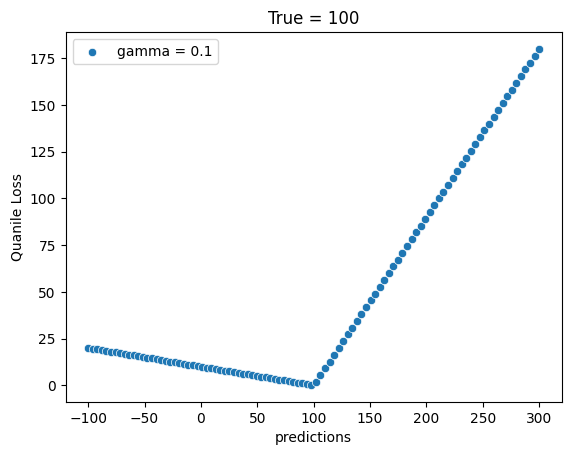

In [7]:
# quantile loss function
def quantile_loss(true, pred, gamma):
    val1 = gamma * np.abs(true - pred)
    val2 = (1-gamma) * np.abs(true - pred)
    q_loss = np.where(true >= pred, val1, val2)
    return q_loss

scores = {}
for gamma_test in [0.1]:
    losses = quantile_loss(true, predictions, gamma_test)
    scores[gamma_test] = losses
df_losses = pd.DataFrame(scores)
df_losses = pd.merge(df_losses, df_predictions, left_index=True, right_index=True)
for gamma_test in [0.1]:
    sns.scatterplot(data=df_losses, x='predictions', y=gamma_test, label=f'gamma = {gamma_test}')
    plt.ylabel('Quanile Loss')
    plt.title('True = 100')